   Score 81-90       Official name
0           16          Arsenal FC
1           16          Watford FC
2           15  West Ham United FC
3           15  Manchester City FC
4           13          Chelsea FC
5           13   Crystal Palace FC
6           12    Swansea City AFC
7           12          Everton FC
8           11     AFC Bournemouth
9           11        Liverpool FC
Top 10 teams that score the most in the interval 81-90 are:

The players that were able to score at least one goal in 8 different intervals are:
                  shortName
0             A. Lacazette
1            K. Schmeichel
2             P. \u010cech
3                 J. Vardy
4                  M. Ryan
5              T. Courtois
6       \u00c1lvaro Morata
7             W. Hennessey
8               J. Butland
9                R. Lukaku
10                 J. Hart
11               R. Elliot
12             S. Mignolet
13                   Gomes
14         Roberto Firmino
15           Mohamed Salah
16        

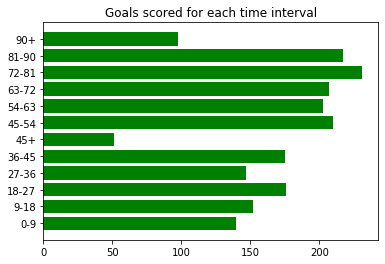

In [8]:
import json
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt

events_England = pd.read_json(r"C:\Users\39335\Downloads\Data\events_England.json")
events_England = events_England.reset_index()
events_England.drop(columns = ["index"], inplace = True)
TeamGoals = dict()   # Teams ID as value, a list of the goals for each time interval
PlayerGoals = dict() # Players ID as value, a list of the goals for each time interval
TotalGoals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # A list of the sum of all goals for each time interval
for i in range(len(events_England["tags"])):
    for j in range(len(events_England["tags"][i])):
    # For each event if the tag is 101 (a goal) I increase the count of a list depending of the minute it was scored
    # There is a different list for each team, each player and the total sum of the goals
        if (101 == events_England["tags"][i][j]["id"]):
            for m in range(6):
                if (m*540 <= events_England["eventSec"][i] <= (m+1)*540 and events_England["matchPeriod"][i] == "1H"):
                    PlayerGoals.setdefault(events_England["playerId"][i], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])[m] += 1
                    TeamGoals.setdefault(events_England["teamId"][i], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])[m] += 1
                    TotalGoals[m] += 1
            for m in range(6):
                if (m*540 <= events_England["eventSec"][i] <= (m+1)*540 and events_England["matchPeriod"][i] == "2H"):
                    PlayerGoals.setdefault(events_England["playerId"][i], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])[6+m] += 1
                    TeamGoals.setdefault(events_England["teamId"][i], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])[6+m] += 1
                    TotalGoals[6+m] += 1
intervals = ["0-9", "9-18", "18-27", "27-36", "36-45", "45+", "45-54", "54-63", "63-72", "72-81", "81-90", "90+"]

######## I ########
plt.barh(intervals, TotalGoals, color = "green")
plt.title('Goals scored for each time interval')

######## II ########
TopScore = []   # List of team ID and goal scored in the interval 81-90
for key in TeamGoals:
    TopScore.append([key, TeamGoals[key][10]])
TopScore = pd.DataFrame(TopScore)
# Data cleaning and merge with the tams.json file to match the teams' ID and their Official Name
TopScore.columns = ["teamId","Score 81-90"]
TopScore = TopScore.sort_values(by = "Score 81-90", ascending=False)
TeamsName = pd.read_json(r"C:\Users\39335\Downloads\Data\teams.json")
TeamsName.drop(columns = ["area", "city", "name", "type"], inplace = True)
TeamsName.columns = ["Official name", "teamId"]
Top10 = pd.merge(TopScore, TeamsName)
Top10.drop("teamId", axis = 1, inplace = True)
print("Top 10 teams that score the most in the interval 81-90 are:\n")
Top10
print(Top10.head(10))

######## III ########
BestPlayers = []   # List of players with at least a goal in at least 8 different intervals.
count = 0
for key in PlayerGoals:
    for i in PlayerGoals[key]:
        if i > 0:
            count += 1
    if count >= 8:
        BestPlayers.append(key)
    count = 0
BestPlayers = pd.DataFrame(BestPlayers)

BestPlayers.columns = ["playerId"]
# Merge with players.json to pair ID with players' names
players = pd.read_json(r"C:\Users\39335\Downloads\Data\players.json")
players.drop(columns = ["passportArea", "weight", "firstName" , "middleName",
            "lastName", "currentTeamId", "birthDate", "role", "birthArea", "foot",
                         "currentNationalTeamId", "height"], inplace = True )
players.rename(columns = ({"wyId":"playerId"}), inplace = True)
PlayerList = pd.merge(BestPlayers, players)
PlayerList.drop(columns = ["playerId"], inplace = True)
print("The players that were able to score at least one goal in 8 different intervals are:\n", PlayerList)

In [4]:
TopScore

,teamId,Score 81-90
0,1609,16
14,1644,16
11,1633,15
2,1625,15
5,1610,13
6,1628,13
18,10531,12
8,1623,12
17,1659,11
15,1612,11


In [5]:
TeamsName

,Official name,teamId
0,Newcastle United FC,1613
1,Real Club Celta de Vigo,692
2,Reial Club Deportiu Espanyol,691
3,Deportivo Alav\u00e9s,696
4,Levante UD,695
5,Esp\u00e9rance Sportive Troyes Aube Champagne,3795
6,Getafe Club de F\u00fatbol,698
7,Borussia VfL M\u00f6nchengladbach,2454
8,Huddersfield Town FC,1673
9,Athletic Club Bilbao,678
